# Définitions

- On dit qu'un sous ensemble $C$ de $\mathbb{R}^d$ est convexe lorsque 
$$
\forall (x,y)\in C^2,\quad \forall \theta\in [0,1],\quad \theta x + (1-\theta)y \in C.
$$
- On dit qu'un point $x$ d'un convexe $C$ est extrémal lorsque si on a $y,z \in C^2$ et $\theta \in]0,1[$ tels que 
$$ \theta y + (1-\theta)z = x$$
alors forcément 
$$x=y=z.$$

# Exercice

On se donne une matrice $A=(a_{i,j})_{1\leq i \leq d,\ 1\leq j \leq m}$ et un vecteur $b\in \mathbb{R}^d$.  On appelle $F_1,\ldots,F_m$ les colonnes de $A$.
1. Montrer que l'ensemble
$$
S :=\{ x\in \mathbb{R}_+^d\ :\ Ax=b\}
$$
est convexe
2. On montrer que $x\in S$ est extrémal si et seulement si la famille
$$
(F_j)_{j\in J(x)} \text{ est libre }
$$
avec 
$$
J(x):=\{ j \in \{1,\ldots,m\}\ :\ x_j\neq 0\}.
$$
3. Coder une fonction générant toutes les sous listes croissantes de `[0,1,...,m-1]` à $d$ éléments.
4. Coder une fonction prenant une matrice $A$ un vecteur $b$ et une liste d'indices de colonnes et renvoyant la solution de $Ax=b$ avec les composantes non nulles dans la liste d'indices.
5. En déduire une fonction python prenant des tableaux numpy $A$ et $b$ et renvoyant la liste des sommets. (On pourra faire l'hypothèse que $A$ est de rang $d$)

**Indication**  On pourra commencer avec
$$
A:=
\begin{pmatrix}
1 & 2 & 1 & 0 & 0\\
1 & 1 & 0 & 1 & 0\\
2 & 1 & 0 & 0 & 1
\end{pmatrix}
\text{ et }
b=
\begin{pmatrix}
8\\5\\8
\end{pmatrix}
$$

In [1]:
import sympy as sp

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
plt.rcParams["figure.figsize"] = (12, 8)

In [6]:
def genere_indices(m, d):
    """Fonctions renvoyant la liste des suites croissantes de d éléments entre 0 et m-1."""
    if d == 1:
        return [[x] for x in range(m)]
    if d == m:
        return [list(range(m))]
    resultat = genere_indices(m - 1, d)
    intermediaires = genere_indices(m - 1, d - 1)
    for suite in intermediaires:
        suite.append(m-1)
    resultat.extend(intermediaires)
    return resultat

In [7]:
genere_indices(5, 1)

[[0], [1], [2], [3], [4]]

In [8]:
genere_indices(5, 5)

[[0, 1, 2, 3, 4]]

In [9]:
genere_indices(5, 4)

[[0, 1, 2, 3], [0, 1, 2, 4], [0, 1, 3, 4], [0, 2, 3, 4], [1, 2, 3, 4]]

In [10]:
genere_indices(5, 3)

[[0, 1, 2],
 [0, 1, 3],
 [0, 2, 3],
 [1, 2, 3],
 [0, 1, 4],
 [0, 2, 4],
 [1, 2, 4],
 [0, 3, 4],
 [1, 3, 4],
 [2, 3, 4]]

**Indication pour 2.**

In [11]:
M = np.random.randint(-5, 5, size=(3, 4))
M

array([[-1,  0,  3,  1],
       [ 4,  3, -2, -1],
       [ 0,  1,  3,  3]])

In [12]:
M[: , [0, 1, 3]]

array([[-1,  0,  1],
       [ 4,  3, -1],
       [ 0,  1,  3]])

In [13]:
def resolution(A, b, indices):
    """Renvoit la solution de Ax=b dont les composantes non nulles sont dans indices."""
    d, m = A.shape
    resultat = np.zeros(m)
    resultat[indices] = np.linalg.solve(A[:, indices], b)
    return resultat

In [14]:
A = np.array([[1, 2, 1, 0, 0], [1, 1, 0, 1, 0], [2, 1, 0, 0, 1]])
b = np.array([8, 5, 8])

In [15]:
resolution(A, b, [2, 3, 4])

array([0., 0., 8., 5., 8.])

In [16]:
def genere_sommets(A, b):
    """Renvoit la liste des sommets du polygone de contrainte Ax=b avec x à composantes positives."""
    resultat = list()
    d, m = A.shape
    for indices in genere_indices(m, d):
        try:
            sol = resolution(A, b, indices)
        except np.linalg.LinAlgError:
            continue
        if np.all(sol >= 0):
            resultat.append(sol)
            
    return resultat

In [17]:
genere_sommets(A, b)

[array([3., 2., 1., 0., 0.]),
 array([4., 0., 4., 1., 0.]),
 array([2., 3., 0., 0., 1.]),
 array([0., 4., 0., 1., 4.]),
 array([0., 0., 8., 5., 8.])]

## Remarque

Comme on a un nombre fini de sommets, on peut résoudre le problème de maximisation de la séance précédente en évaluant la fonctionnelle au sommet puis en sélectionnant la plus grande valeur.

In [18]:
c = np.array([2, 3, 0, 0, 0])
for sommet in genere_sommets(A, b):
    print(sommet, " : ", np.dot(c, sommet))

[3. 2. 1. 0. 0.]  :  12.0
[4. 0. 4. 1. 0.]  :  8.0
[2. 3. 0. 0. 1.]  :  13.0
[0. 4. 0. 1. 4.]  :  12.0
[0. 0. 8. 5. 8.]  :  0.0


# Exercice
Déterminer les sommets de l'ensemble de contrainte
$$
\begin{cases}
x-y \geq -1\\
2x+y \leq 8\\
x+y\leq 5\\
x\geq 0\\
y\geq 0
\end{cases}
$$
à la fois géométriquement et avec la fonction précédente

In [19]:
x, y = sp.symbols("x y")

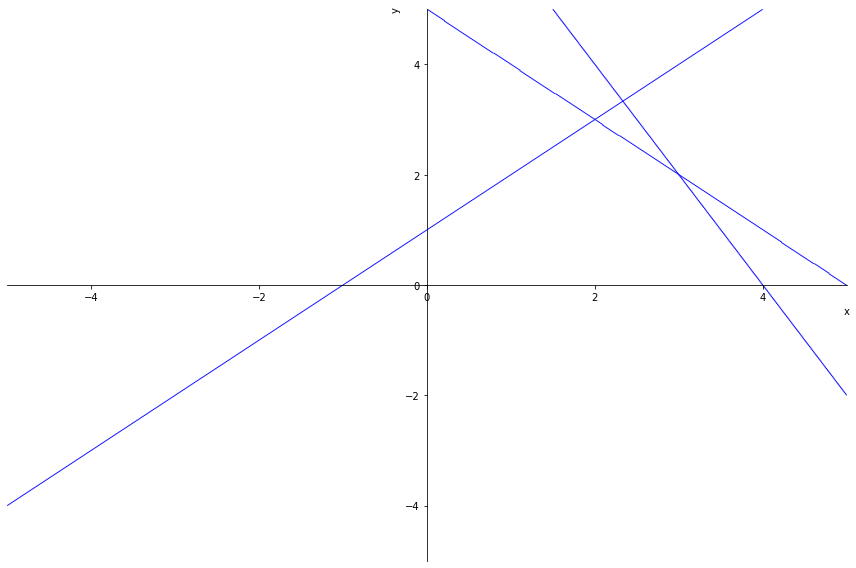

In [24]:
p = sp.plot_implicit(sp.Eq(x - y, -1), show=False)
p.extend(sp.plot_implicit(sp.Eq(2*x+y, 8), show=False))
p.extend(sp.plot_implicit(sp.Eq(x + y, 5), show=False))
p.show()

In [31]:
sommets = [sp.Point(0, 0), sp.Point(0, 1), sp.Point(2, 3), sp.Point(2, 3), sp.Point(4, 0)]
print(sommets)


[Point2D(0, 0), Point2D(0, 1), Point2D(2, 3), Point2D(2, 3), Point2D(4, 0)]
